# Анализ клиентской базы банка

## Описание проекта

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых. Необходимо спрогнозировать, уйдёт клиент из банка в ближайшее время или нет.
Для обучения предоставлены исторические данные о поведении клиентов и расторжении договоров с банком.
Необходимо построить модель с предельно большим значением F1-меры. Необходимо довести метрику до 0.59.

### Описание данных
**Признаки:**
* `RowNumber` — индекс строки в данных;
* `CustomerId` — уникальный идентификатор клиента;
* `Surname` — фамилия;
* `CreditScore` — кредитный рейтинг;
* `Geography` — страна проживания;
* `Gender` — пол;
* `Age` — возраст;
* `Tenure` — сколько лет человек является клиентом банка;
* `Balance` — баланс на счёте;
* `NumOfProducts` — количество продуктов банка, используемых клиентом;
* `HasCrCard` — наличие кредитной карты;
* `IsActiveMember` — активность клиента;
* `EstimatedSalary` — предполагаемая зарплата.

**Целевой признак:**
* `Exited` — факт ухода клиента.

### План работы по проекту

* Загрузка и подготовка данных;
* Исследование баланса классов и первоначальное обучение модели;
* Улучшите качества модели;
* Финальное тестирование;
* Выводы по проекту.

## Загрузка и подготовка данных

### Импорты и настройки

Импорты:

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, make_scorer, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.utils import shuffle
from IPython.display import display, HTML

Настройки:

In [2]:
display(HTML("<style>.container { width:90% !important; }</style>")) # Широкий формат

### Загрузка и первоначальный осмотр

Загрузка данных:

In [3]:
try:
    original_df = pd.read_csv('/datasets/Churn.csv', index_col='RowNumber') # RowNumber установим как индекс
    print('Данные из Практикума загружены.')
except:
    original_df = pd.read_csv('datasets/Churn.csv', index_col='RowNumber') # RowNumber установим как индекс
    print('Локальные данные загружены.')

display('Размеры загруженного датафрейма:')
original_df.shape

Локальные данные загружены.


'Размеры загруженного датафрейма:'

(10000, 13)

Просмотр оригинального датасета:

In [4]:
display(original_df.head())
display(original_df.tail())
original_df.info()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
9996,15606229,Obijiaku,771,France,Male,39,5.0,0.00,2,1,0,96270.64,0
9997,15569892,Johnstone,516,France,Male,35,10.0,57369.61,1,1,1,101699.77,0
9998,15584532,Liu,709,France,Female,36,7.0,0.00,1,0,1,42085.58,1
9999,15682355,Sabbatini,772,Germany,Male,42,3.0,75075.31,2,1,0,92888.52,1
10000,15628319,Walker,792,France,Female,28,NaN,130142.79,1,1,0,38190.78,0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           9091 non-null   float64
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(3), int64(7), object(3)
memory usage: 1.1+ MB


Визуальный осмотр пропусков:

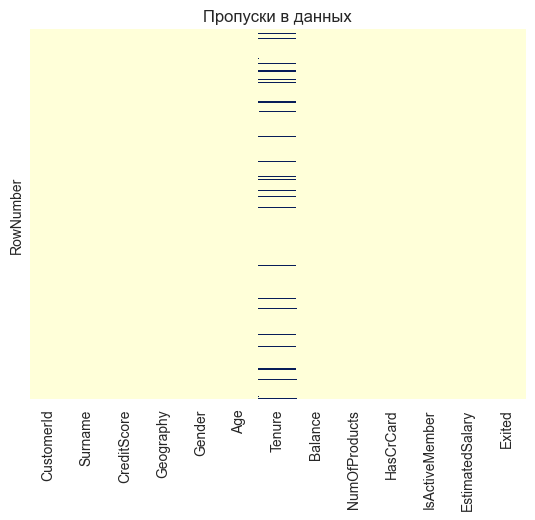

In [5]:
sns.heatmap(original_df.isna(), yticklabels=False, cbar=False, cmap="YlGnBu").set_title('Пропуски в данных');

**Результаты:**
* Данные в размере 10 000 строк.
* 909 пропусков по столбцу Tenure(сколько лет человек является клиентом банка). По остальным столбцам пропусков нет.
* Неверные типы по столбцу Tenure (int64).

### Первоначальная подготовка

In [6]:
# Создадим рабочую копию датафрейма
df = original_df.copy()

In [7]:
# Приведем названия столбцов и индекса к снейк-кейс
df.columns = ['customer_id', 'surname', 'credit_score', 'geography',
       'gender', 'age', 'tenure', 'balance', 'num_of_products', 'has_cr_card',
       'is_active_member', 'estimated_salary', 'exited']
df.index.name = 'row_number'
df.index.name, df.columns

('row_number',
 Index(['customer_id', 'surname', 'credit_score', 'geography', 'gender', 'age',
        'tenure', 'balance', 'num_of_products', 'has_cr_card',
        'is_active_member', 'estimated_salary', 'exited'],
       dtype='object'))

In [8]:
# Заменим тип для Tenure
df['tenure'] = df['tenure'].astype('Int64')
df.dtypes

customer_id           int64
surname              object
credit_score          int64
geography            object
gender               object
age                   int64
tenure                Int64
balance             float64
num_of_products       int64
has_cr_card           int64
is_active_member      int64
estimated_salary    float64
exited                int64
dtype: object

**Результаты:**
* Столбцы переименованы, типы приведены в порядок.

### Повторы

In [9]:
# Посмотрим на полные дубли
df.duplicated().sum()

0

In [10]:
# Посмотрим на повторы в id
df.duplicated(subset='customer_id').sum()

0

In [11]:
# Посмотрим на неявные повторы в географии
df['geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

**Результаты:**
* Дублей в данных нет.

### Первоначальный визуальный осмотр

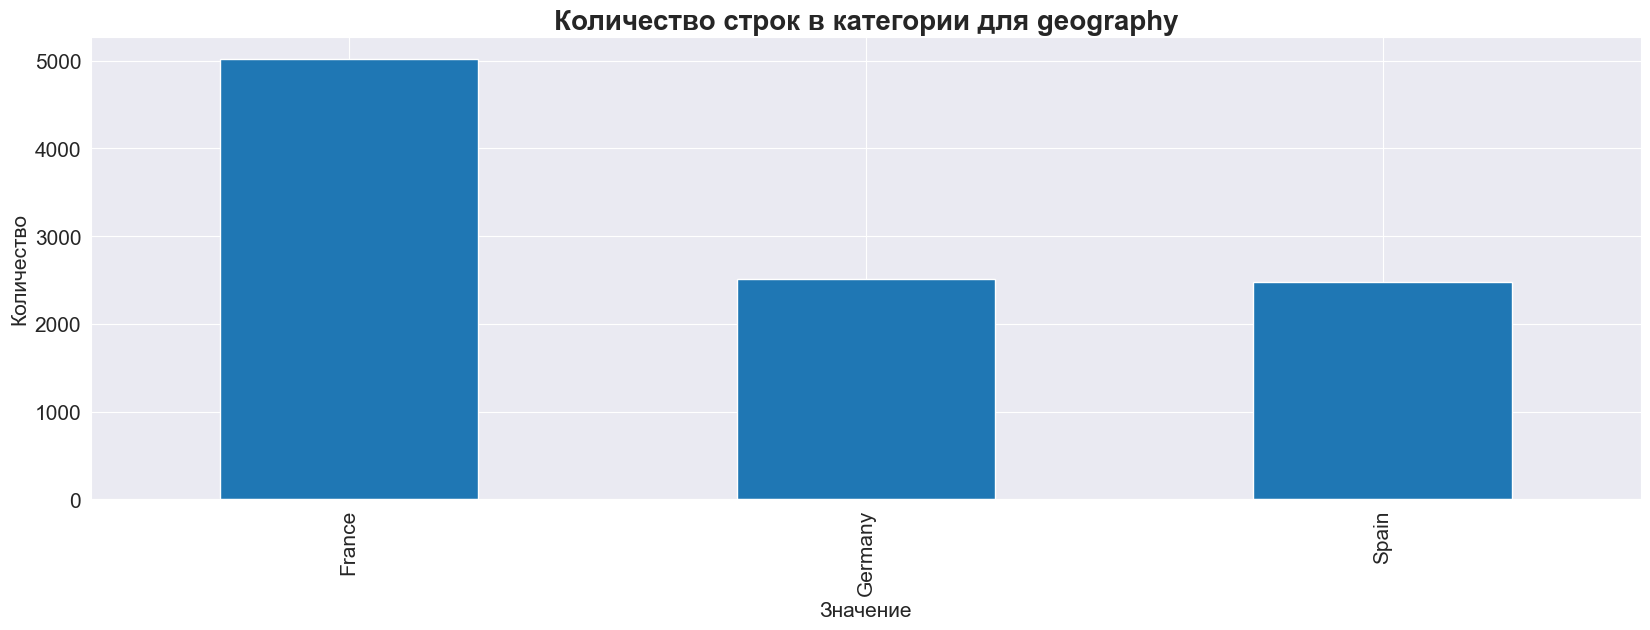

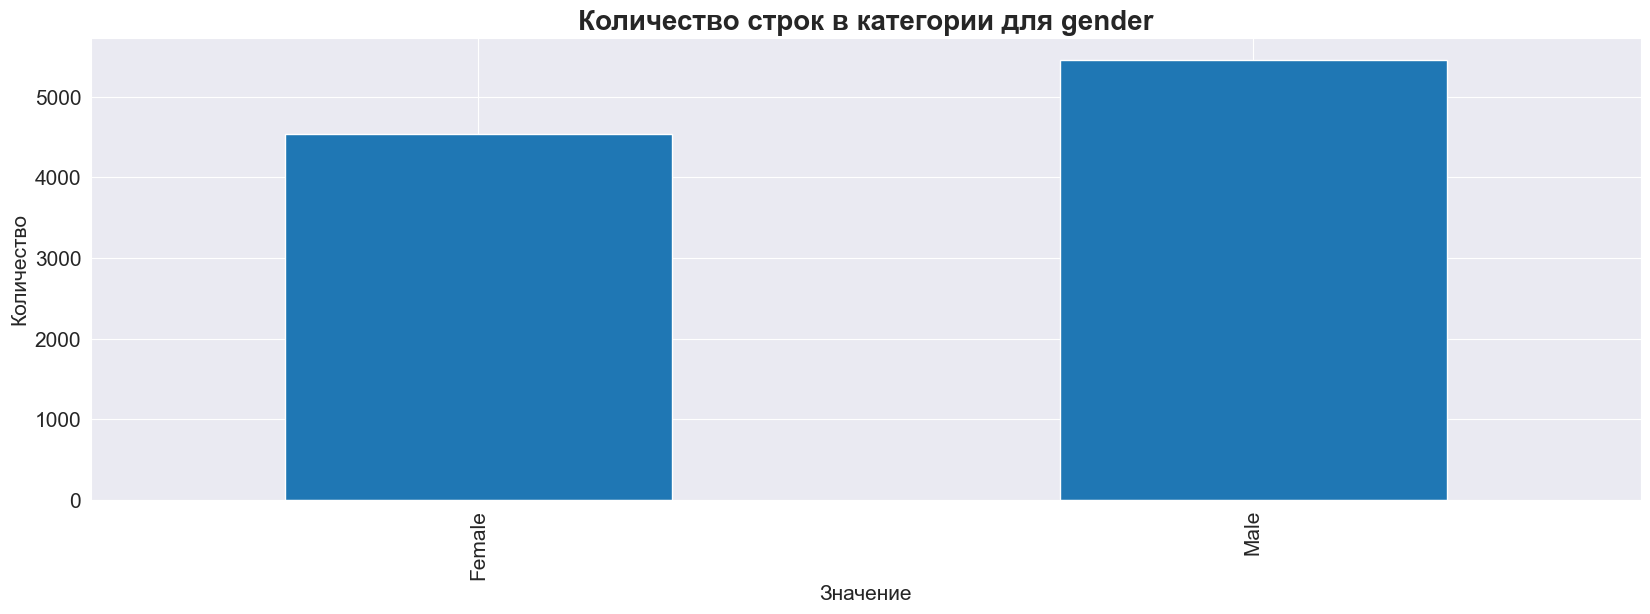

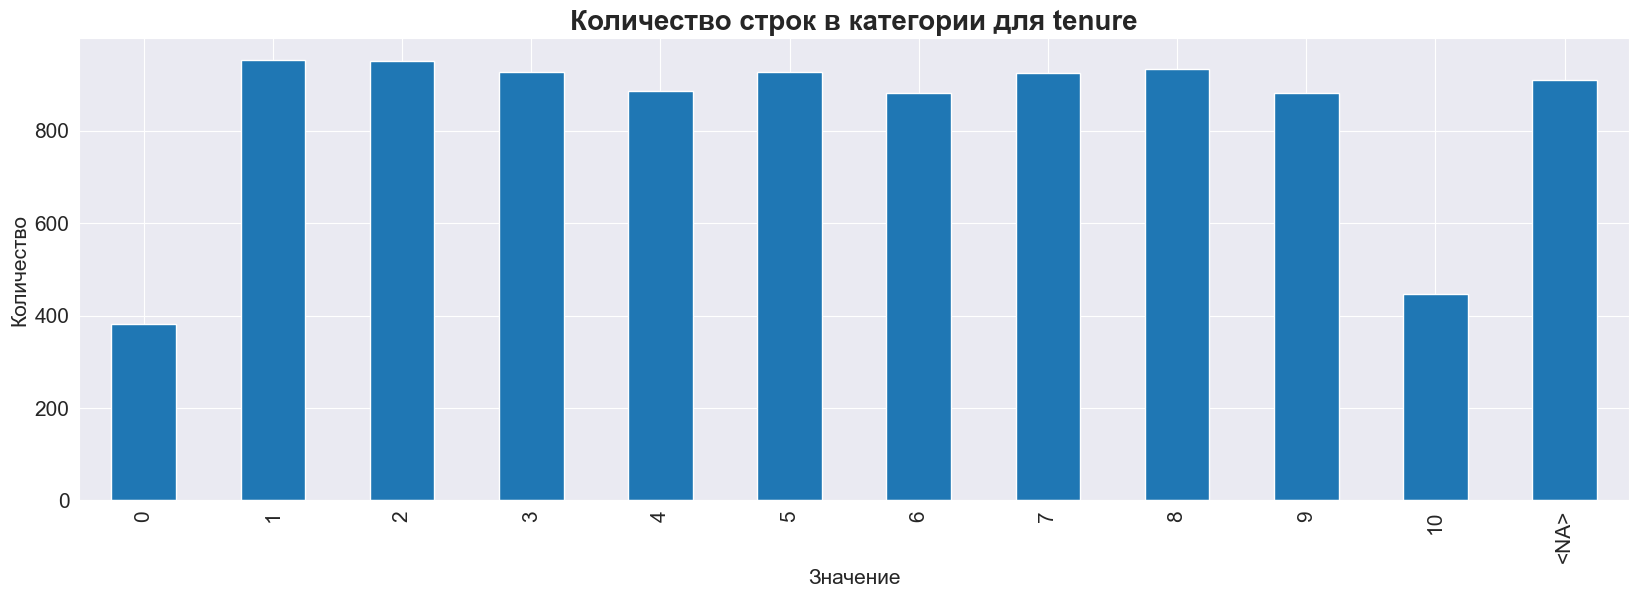

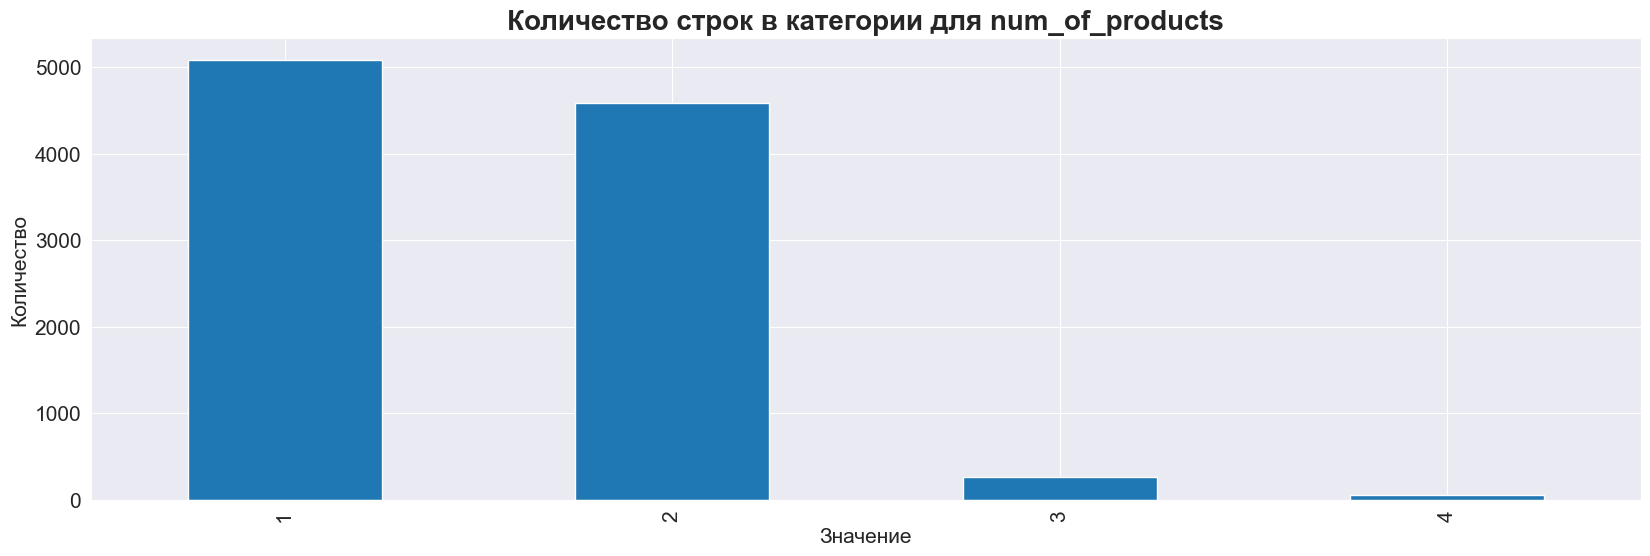

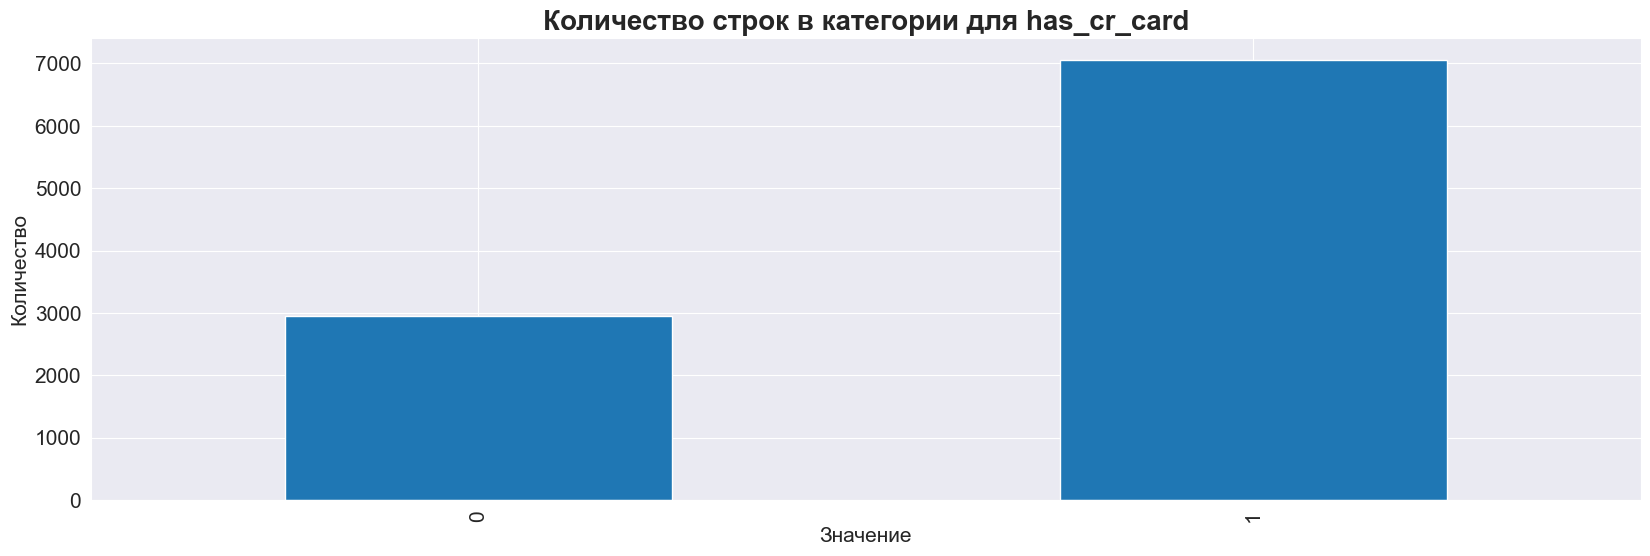

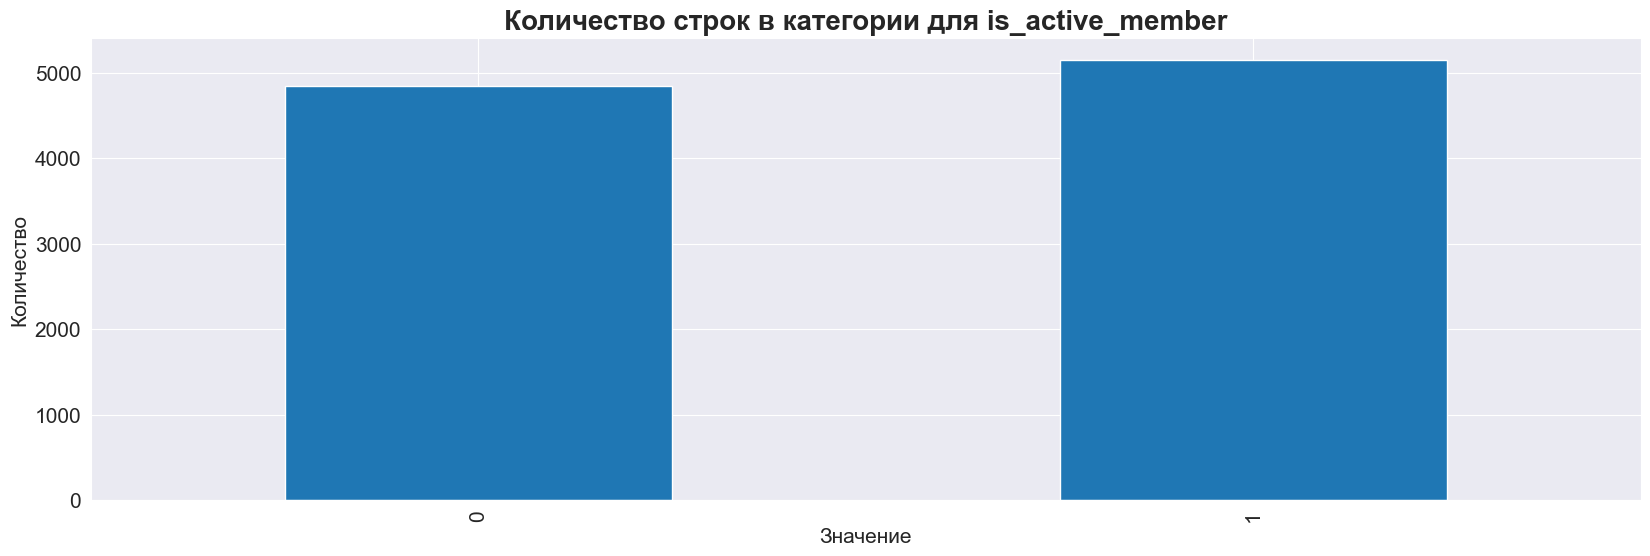

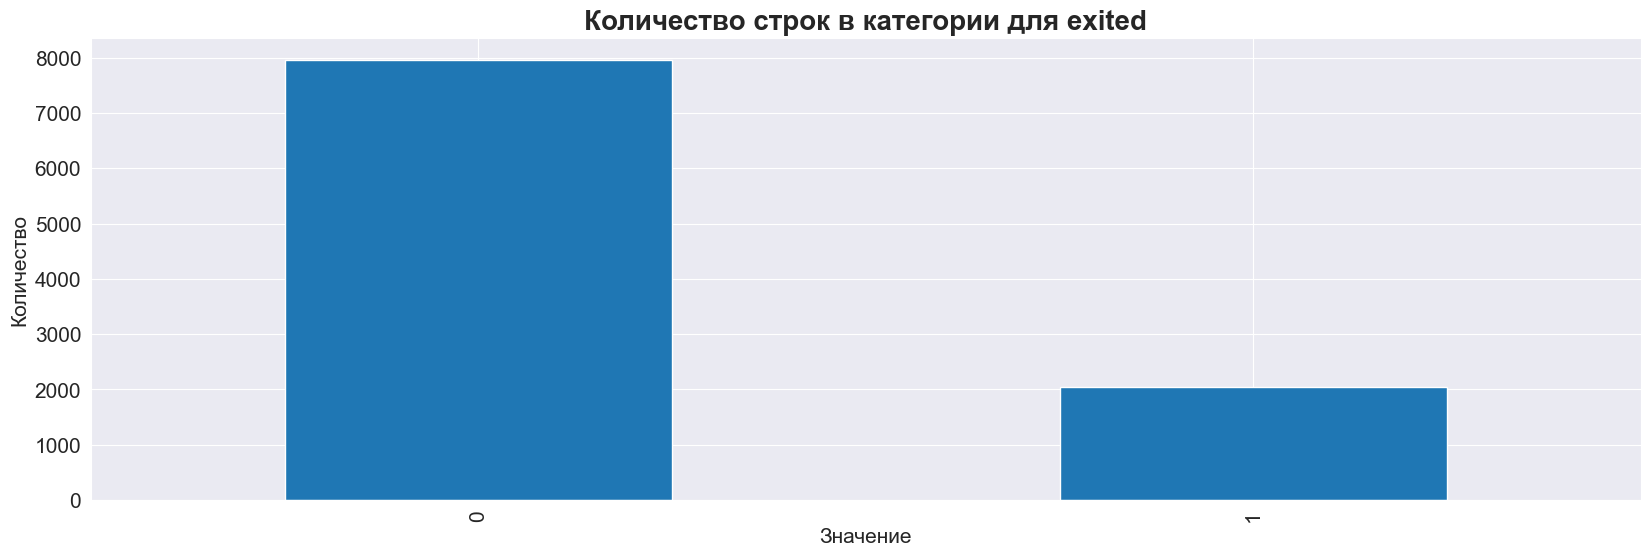

In [12]:
# Категории
columns_for_visualization = ['geography', 'gender', 'tenure', 'num_of_products', 'has_cr_card', 'is_active_member', 'exited']

for column in columns_for_visualization:
    # Готовим данные
    data_for_visualization = df[column].value_counts(dropna=False).sort_index()
    # Строим график
    fig, ax = plt.subplots(figsize=(20, 6))
    ax.set_title(f'Количество строк в категории для {column}', fontsize = 20, weight='bold')
    ax.set_xlabel('Значение', fontsize = 15)
    ax.set_ylabel('Количество', fontsize = 15)
    ax.tick_params(axis='both', labelsize=15)
    data_for_visualization.plot(kind='bar', ax=ax)

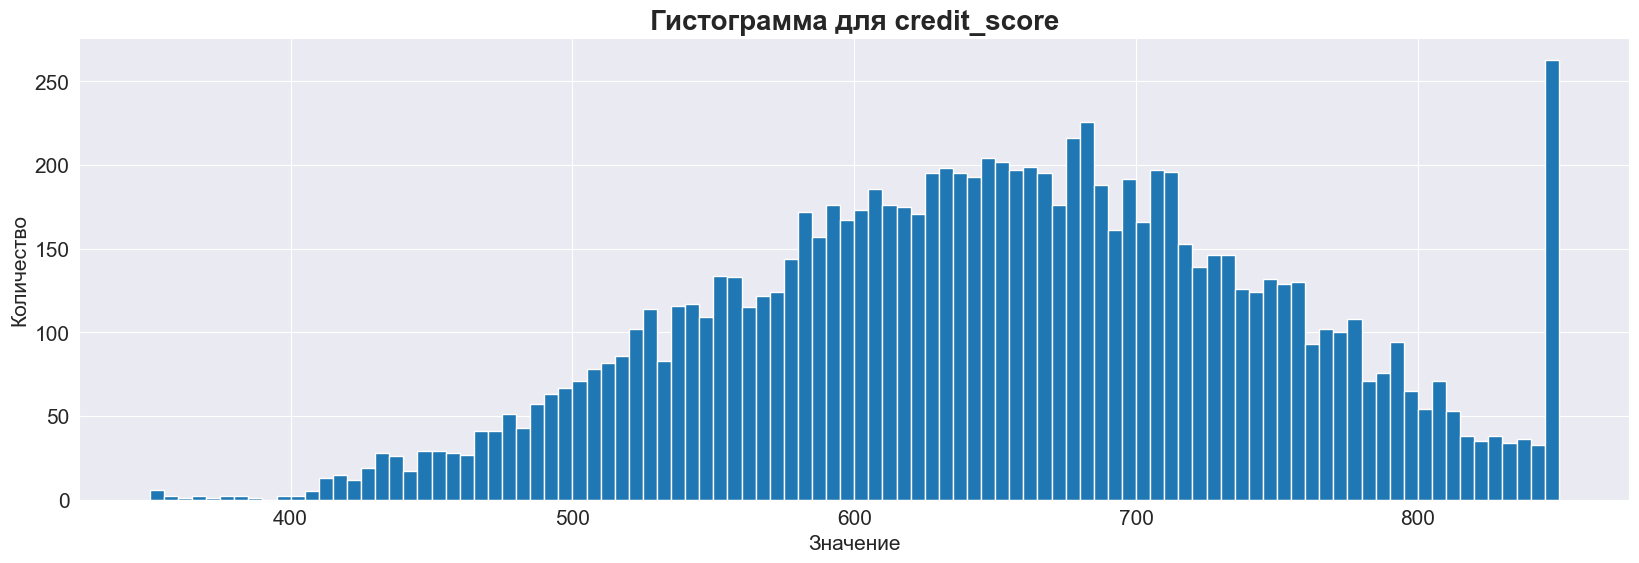

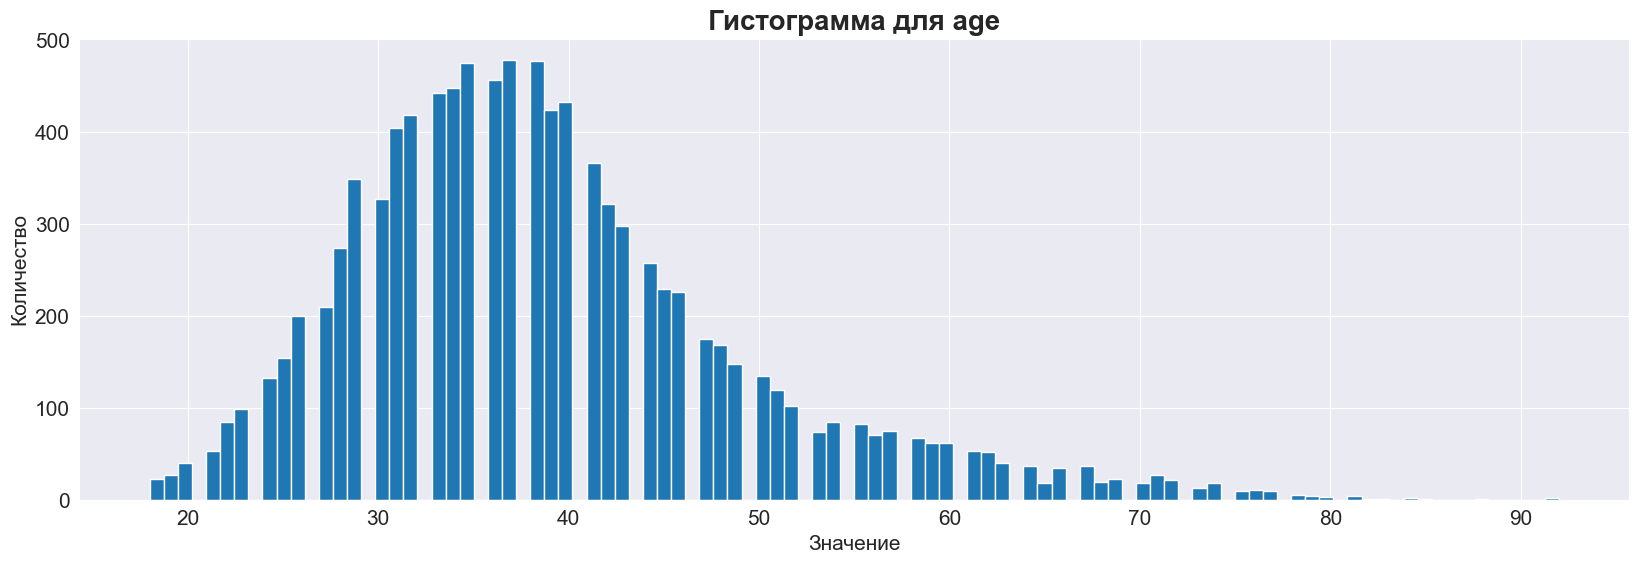

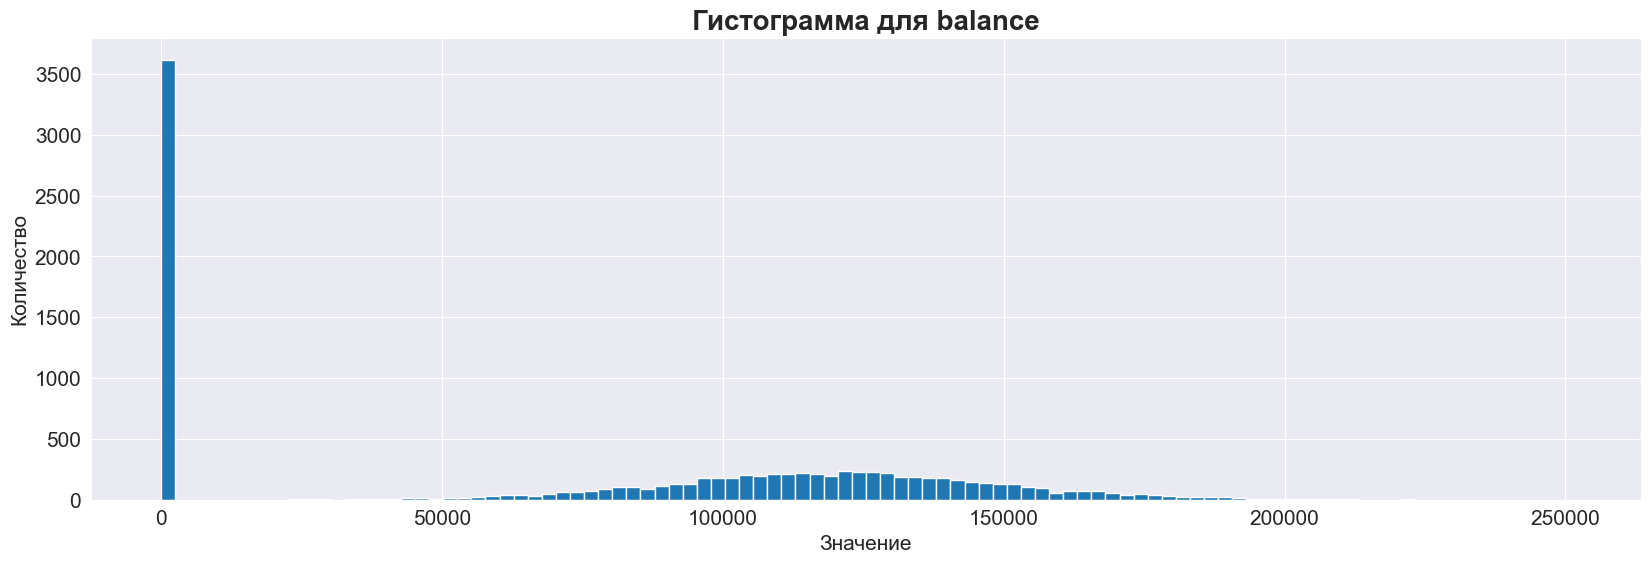

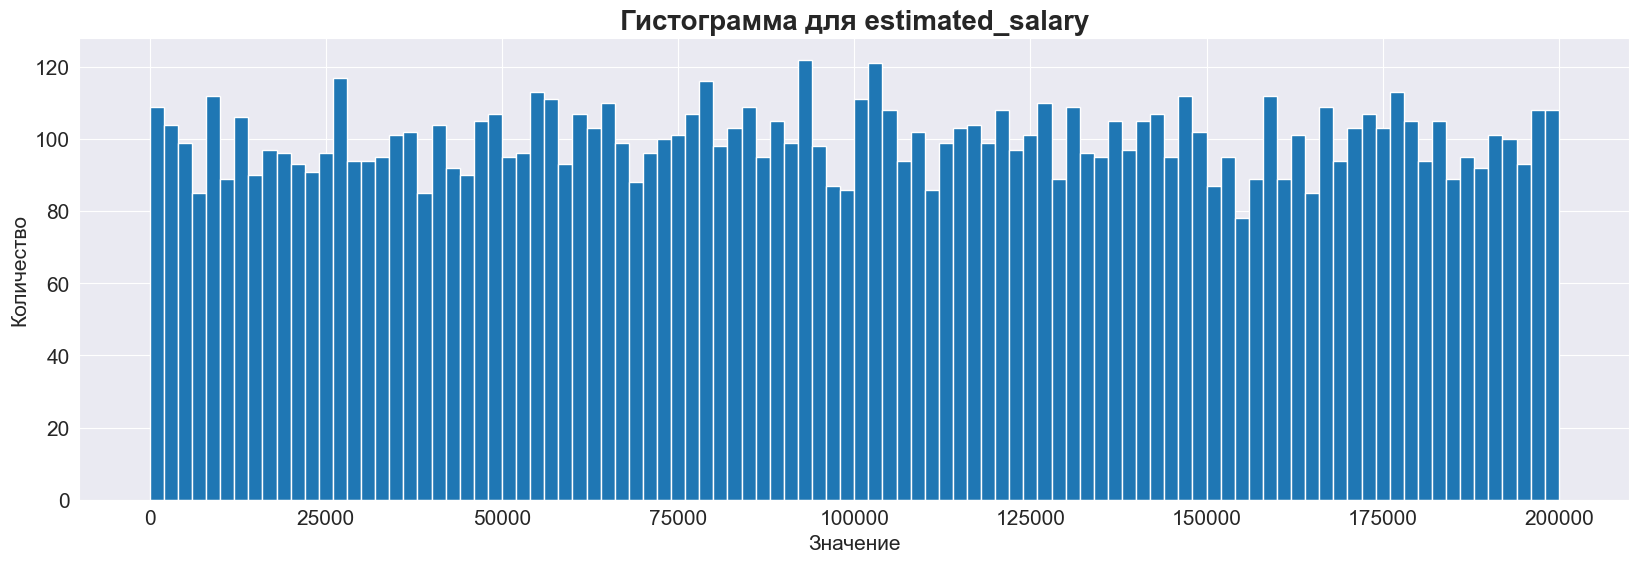

In [13]:
# Распределения
columns_for_visualization = ['credit_score', 'age', 'balance', 'estimated_salary']

for column in columns_for_visualization:
    # Строим график
    fig, ax = plt.subplots(figsize=(20, 6))
    ax.set_title(f'Гистограмма для {column}', fontsize = 20, weight='bold')
    ax.set_xlabel('Значение', fontsize = 15)
    ax.set_ylabel('Количество', fontsize = 15)
    ax.tick_params(axis='both', labelsize=15)
    df[column].hist(bins=100, ax=ax)

**Результаты:**
* Несколько необычно распределены пользователи по tenure и estimated_salary. Слишком равномерно, что не очень естественно для этих показателей.
* Выборка для обучения skewed. В целевом столбце преобладают пользователи, которые не перестали пользоваться услугами банка.
* Есть существенные доли пользователей с околомаксимальным кредитным рейтингом и с околонулевым балансом. Для дальнейшего обучения, возможно, будет полезно выделить эти категории в отдельные признаки.

### Пропуски

In [14]:
# Для пропусков по tenure поставим пока заглушку со значением -1 и добавим столбец is_tenure_na.
df.loc[df['tenure'].isna(), ['tenure']] = -1
df['is_tenure_na'] = df['tenure'].apply(lambda x: 1 if x==-1 else 0)
display(f'Количество пропусков в датафрейме: {df.isna().sum().sum()}')

'Количество пропусков в датафрейме: 0'

**Результаты:**
* Заполнение пропусков в `tenure` проблематично. Среди вариантов может быть заполнение медианным значением по подгруппам has_cr_card или is_active_member. Используем эти два способа и посмотрим на их влияние на результат обучения ниже. Пока поставлены заглушки.
* Все пропуски устранены.

### Выводы

* Достаточное количество данных для обучения.
* Данные приведены в порядок (столбцы, пропуски, дубли).
* На месте 909 пропусков установлены заглушки.
* Целевой признак несбалансирован.
* Есть необычные группы пользователей с максимальным кредитным рейтингом и нулевым балансом.

## Исследование баланса классов и первоначальное обучение модели

Баланса классов нет, но для первоначального обучения опустим этот факт. Проверим первоначальные результаты для классификаторов LR, DTC, RFC. Но станачала подготовим датасет для обучения.

In [15]:
# Создадим словарь для хранения результатов работы моделей
best_results_by_model = {}

### Подготовка датасета для обучения

In [16]:
# Опустим id и фамилию клиента, т.к. для обучения они неинформативны
df.drop(columns=['customer_id', 'surname'], inplace=True)

In [17]:
# Преобразуем географию и пол в dummies
df = pd.get_dummies(data=df, columns=['geography', 'gender'], drop_first=True)
df.shape, df.dtypes

((10000, 13),
 credit_score           int64
 age                    int64
 tenure                 Int64
 balance              float64
 num_of_products        int64
 has_cr_card            int64
 is_active_member       int64
 estimated_salary     float64
 exited                 int64
 is_tenure_na           int64
 geography_Germany      uint8
 geography_Spain        uint8
 gender_Male            uint8
 dtype: object)

In [18]:
# Выделим фичасет и таргет
X = df.drop(columns='exited')
y = df['exited']
X.shape, y.shape

((10000, 12), (10000,))

In [19]:
# Выделим train, test сеты. Dev не выделяем, т.к. будем использовать k-fold. Для test 20% stratified сета будет вполне достаточно.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=777)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((8000, 12), (8000,), (2000, 12), (2000,))

In [20]:
# Отскейлим фичи для оптимизации вычислений
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Первоначальное обучение

In [21]:
%%time
# Logistic Regression
kf = StratifiedKFold(n_splits=5, random_state=777, shuffle=True)
params = {'C':[1, 0.9, 0.8, 0.1, 0.01]}
clf = GridSearchCV(LogisticRegression(solver='liblinear', random_state=777), cv=kf, scoring=make_scorer(f1_score), param_grid=params)
clf.fit(X_train_scaled, y_train)
display(f'Лучшая оценка: {clf.best_score_:.4}')
display(f'Лучшие параметры: {clf.best_params_}')

# Посчитаем средний AUC-ROC, для этого выделим dev подвыборки для каждого сплита
roc_auc_scores = []
best_model_LR = clf.best_estimator_
for i, (train_index, dev_index) in enumerate(kf.split(X_train_scaled, y_train)):
    # По каждому сплиту делаем отдельный train и dev датасет
    X_train_split = X_train_scaled[train_index]
    y_train_split = y_train.iloc[train_index]
    X_dev_split = X_train_scaled[dev_index]
    y_dev_split = y_train.iloc[dev_index]

    # Обучаем
    best_model_LR.fit(X_train_split, y_train_split)

    # Считаем roc-auc
    roc_auc_scores.append(roc_auc_score(y_dev_split, best_model_LR.predict_proba(X_dev_split)[:, 1]))

display(f'Средний по сплитам AUC-ROC для лучших параметров: {sum(roc_auc_scores) / len(roc_auc_scores):.4}')

# Сохраним лучший результат
best_results_by_model[f'LR,{clf.best_params_}'] = clf.best_score_

'Лучшая оценка: 0.3157'

"Лучшие параметры: {'C': 0.8}"

'Средний по сплитам AUC-ROC для лучших параметров: 0.7635'

CPU times: total: 1.58 s
Wall time: 2.85 s


In [22]:
%%time
# DecisionTreeClassifier
kf = StratifiedKFold(n_splits=5, random_state=777, shuffle=True)
params = {'max_depth': range(5, 15, 1)}
clf = GridSearchCV(DecisionTreeClassifier(random_state=777), cv=kf, scoring=make_scorer(f1_score), param_grid=params)
clf.fit(X_train_scaled, y_train)
display(f'Лучшая оценка: {clf.best_score_:0.4}')
display(f'Лучшие параметры: {clf.best_params_}')

# Посчитаем средний AUC-ROC, для этого выделим dev подвыборки для каждого сплита
roc_auc_scores = []
best_model_DTC = clf.best_estimator_
for i, (train_index, dev_index) in enumerate(kf.split(X_train_scaled, y_train)):
    # По каждому сплиту делаем отдельный train и dev датасет
    X_train_split = X_train_scaled[train_index]
    y_train_split = y_train.iloc[train_index]
    X_dev_split = X_train_scaled[dev_index]
    y_dev_split = y_train.iloc[dev_index]

    # Обучаем
    best_model_DTC.fit(X_train_split, y_train_split)

    # Считаем roc-auc
    roc_auc_scores.append(roc_auc_score(y_dev_split, best_model_DTC.predict_proba(X_dev_split)[:, 1]))

display(f'Средний по сплитам AUC-ROC для лучших параметров: {sum(roc_auc_scores) / len(roc_auc_scores):.4}')

# Сохраним лучший результат
best_results_by_model[f'DTC,{clf.best_params_}'] = clf.best_score_

'Лучшая оценка: 0.5767'

"Лучшие параметры: {'max_depth': 7}"

'Средний по сплитам AUC-ROC для лучших параметров: 0.8221'

CPU times: total: 6.27 s
Wall time: 16.2 s


In [23]:
%%time
# RandomForestClassifier
kf = StratifiedKFold(n_splits=5, random_state=777, shuffle=True)
params = {'max_depth': range(15, 20, 1),
          'n_estimators': range(35, 40, 1)}
clf = GridSearchCV(RandomForestClassifier(random_state=777), cv=kf, scoring=make_scorer(f1_score), param_grid=params)
clf.fit(X_train_scaled, y_train)
display(f'Лучшая оценка: {clf.best_score_:0.4}')
display(f'Лучшие параметры: {clf.best_params_}')

# Посчитаем средний AUC-ROC, для этого выделим dev подвыборки для каждого сплита
roc_auc_scores = []
best_model_RFC = clf.best_estimator_
for i, (train_index, dev_index) in enumerate(kf.split(X_train_scaled, y_train)):
    # По каждому сплиту делаем отдельный train и dev датасет
    X_train_split = X_train_scaled[train_index]
    y_train_split = y_train.iloc[train_index]
    X_dev_split = X_train_scaled[dev_index]
    y_dev_split = y_train.iloc[dev_index]

    # Обучаем
    best_model_RFC.fit(X_train_split, y_train_split)

    # Считаем roc-auc
    roc_auc_scores.append(roc_auc_score(y_dev_split, best_model_RFC.predict_proba(X_dev_split)[:, 1]))

display(f'Средний по сплитам AUC-ROC для лучших параметров: {sum(roc_auc_scores) / len(roc_auc_scores):.4}')

# Сохраним лучший результат
best_results_by_model[f'RFC,{clf.best_params_}'] = clf.best_score_

# Сохраним лучшую модель
best_model = clf.best_estimator_

'Лучшая оценка: 0.5799'

"Лучшие параметры: {'max_depth': 19, 'n_estimators': 37}"

'Средний по сплитам AUC-ROC для лучших параметров: 0.8377'

CPU times: total: 2min 43s
Wall time: 5min 19s


"Лучшая модель: RFC,{'max_depth': 19, 'n_estimators': 37}"

'Лучшая точность: 0.58'

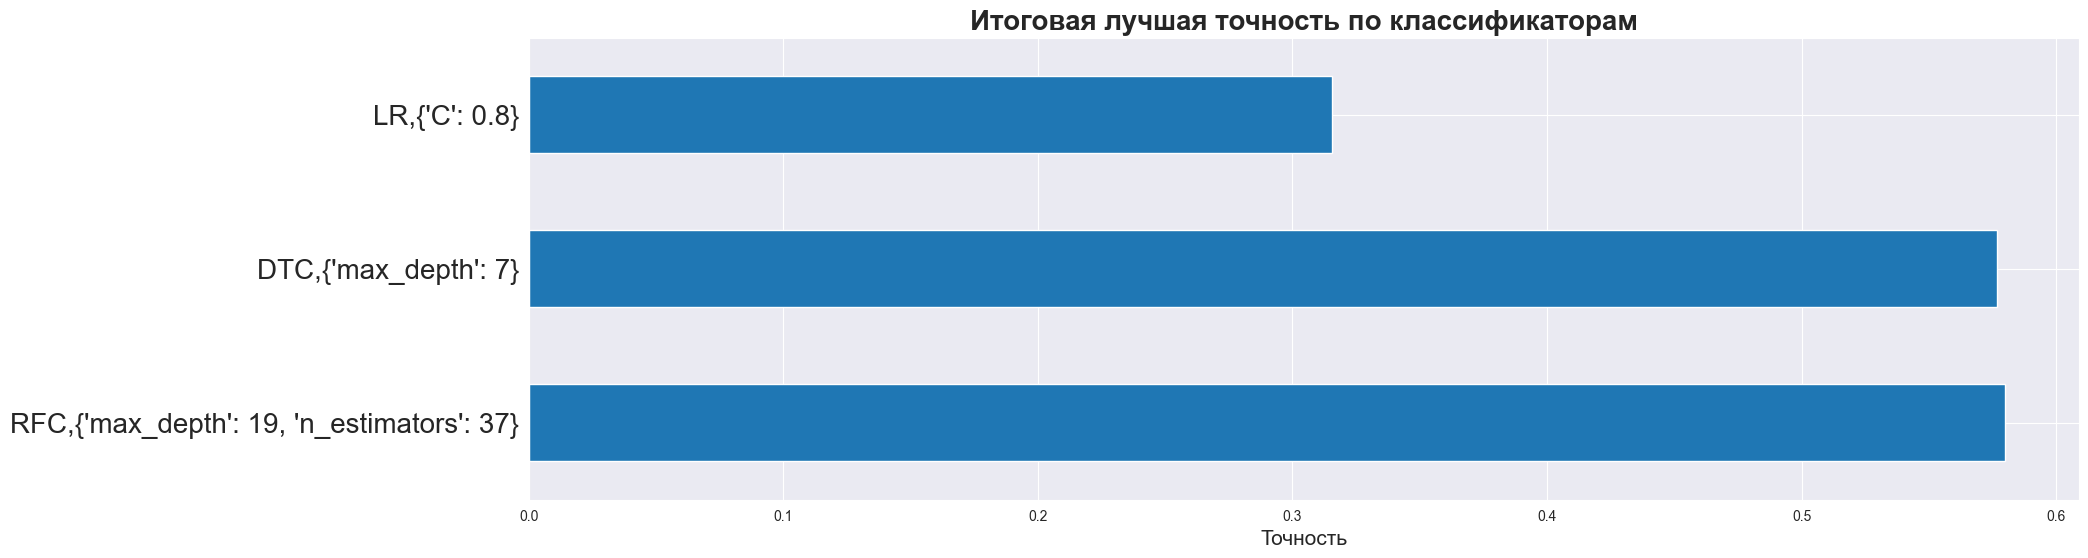

In [24]:
# Итоги по тестированию различных моделей
best_results_by_model = pd.Series(best_results_by_model).sort_values(ascending=False)
fig, ax = plt.subplots(figsize=(20, 6))
ax.set_title('Итоговая лучшая точность по классификаторам', fontsize=20, weight='bold')
ax.set_xlabel('Точность', fontsize=15)
ax.tick_params(axis='y', which='both', labelsize=20)
best_results_by_model.plot(kind='barh')
display(
    f'Лучшая модель: {best_results_by_model[best_results_by_model == best_results_by_model.max()].index.tolist()[0]}')
display(
    f'Лучшая точность: {best_results_by_model[best_results_by_model == best_results_by_model.max()].tolist()[0]:.2}')

### Выводы

* Лучшие первоначальные результаты без учёта дисабаланса в целевом столбце даёт модель RFC с параметрами max_depth=19 и n_estimators: 37. Сосредоточимся в дальнейшем на улучшении показателей именно этой модели.
* Очень близкую оценку так же даёт DTC, она проще и быстрее, но т.к. ограничений у нас нет, мы будем использовать RFC.

## Улучшение качества модели

In [25]:
# Сохраним лучшую модель
selected_model = best_model
selected_f1_score = best_results_by_model.max()
selected_model, selected_f1_score

(RandomForestClassifier(max_depth=19, n_estimators=37, random_state=777),
 0.5798751187611282)

**Проверим ряд гипотез:**
* **Гипотеза 1:** Выделение признаков `max_cr_score` и `is_balance_zero` улучшит модель.
* **Гипотеза 2:** Удаление Nan в столбце `tenure` улучит модель.
* **Гипотеза 3:** Замена -1 на median по группам `has_cr_card` в столбце `tenure` улучит модель.
* **Гипотеза 4:** Замена -1 на median по группам `is_active_member` в столбце `tenure` улучит модель.
* **Гипотеза 5:** Дублирование примеров с целевой функцией равной 1 улучшит модель.
* **Гипотеза 6:** Удаление части примеров с целевой функцией равной 0 улучшит модель.

### Гипотеза 1
Выделение признаков `max_cr_score` и `is_balance_zero` улучшит модель.

In [26]:
# Готовим модифицированный датасет
X_train_modified = X_train.copy()
max_cr_score = X_train['credit_score'].max()
X_train_modified['max_cr_score'] = X_train['credit_score'].apply(lambda x: 1 if x == max_cr_score else 0) # Максимальный кредитный рейтинг
X_train_modified['is_balance_zero'] = X_train['balance'].apply(lambda x: 1 if x == 0 else 0) # Нулевой баланс
X_train_modified_scaled = scaler.fit_transform(X_train_modified) # Скейлим заново

In [27]:
%%time
# Обучаем RandomForestClassifier
kf = StratifiedKFold(n_splits=5, random_state=777, shuffle=True)
# Снова подбираем лучшие параметры
params = {'max_depth': range(13, 17, 1),
          'n_estimators': range(35, 40, 1)}
clf = GridSearchCV(selected_model, cv=kf, scoring=make_scorer(f1_score), param_grid=params)
clf.fit(X_train_modified_scaled, y_train)
display(f'Лучшие параметры: {clf.best_params_}')
display(f'Оценка: {clf.best_score_:0.4}')
display(f'Базовая оценка для сравнения: {selected_f1_score:.4}')

# Результат
if clf.best_score_ > selected_f1_score:
    display(f'Гипотеза подтверждена. Выигрыш: {selected_f1_score - clf.best_score_:.4}')
else:
    display(f'Гипотеза не подтверждена.')

"Лучшие параметры: {'max_depth': 15, 'n_estimators': 37}"

'Оценка: 0.5742'

'Базовая оценка для сравнения: 0.5799'

'Гипотеза не подтверждена.'

CPU times: total: 1min 44s
Wall time: 1min 47s


### Гипотеза 2
Удаление Nan в столбце `tenure` улучшит модель.

In [28]:
# Готовим модифицированный датасет
X_train_modified = X_train.copy()
X_train_modified = X_train_modified[X_train_modified['tenure'] != -1] # Удаляем пропуски
y_train_modified = y_train.copy()[X_train_modified.index] # Удаляем пропуски в таргете
X_train_modified_scaled = scaler.fit_transform(X_train_modified) # Скейлим заново

In [29]:
%%time
# Обучаем RandomForestClassifier
kf = StratifiedKFold(n_splits=5, random_state=777, shuffle=True)
# Снова подбираем лучшие параметры
params = {'max_depth': range(15, 20, 1),
          'n_estimators': range(35, 40, 1)}
clf = GridSearchCV(selected_model, cv=kf, scoring=make_scorer(f1_score), param_grid=params)
clf.fit(X_train_modified_scaled, y_train_modified)
display(f'Лучшие параметры: {clf.best_params_}')
display(f'Оценка: {clf.best_score_:0.4}')
display(f'Базовая оценка для сравнения: {selected_f1_score:.4}')

# Результат
if clf.best_score_ > selected_f1_score:
    display(f'Гипотеза подтверждена. Выигрыш: {clf.best_score_ - selected_f1_score:.4}')
else:
    display(f'Гипотеза не подтверждена.')

"Лучшие параметры: {'max_depth': 18, 'n_estimators': 39}"

'Оценка: 0.5719'

'Базовая оценка для сравнения: 0.5799'

'Гипотеза не подтверждена.'

CPU times: total: 2min 17s
Wall time: 3min


### Гипотеза 3
Замена -1 на median по группам `has_cr_card` в столбце `tenure` улучит модель.


In [30]:
# Готовим модифицированный датасет
X_train_modified = X_train.copy()
tenure_grouped_by_has_cr_card = X_train_modified.groupby('has_cr_card')['tenure'].median() # Берем медианы по подгруппам
X_train_modified['tenure'] = X_train_modified.apply(lambda x: tenure_grouped_by_has_cr_card[x['has_cr_card']] if x['tenure'] == -1 else x['tenure'], axis='columns') # Замена на медианные значения
X_train_modified_scaled = scaler.fit_transform(X_train_modified) # Скейлим заново

In [31]:
%%time
# RandomForestClassifier
kf = StratifiedKFold(n_splits=5, random_state=777, shuffle=True)
# Снова подбираем лучшие параметры
params = {'max_depth': range(15, 20, 1),
          'n_estimators': range(35, 40, 1)}
clf = GridSearchCV(selected_model, cv=kf, scoring=make_scorer(f1_score), param_grid=params)
clf.fit(X_train_modified_scaled, y_train)
display(f'Лучшие параметры: {clf.best_params_}')
display(f'Оценка: {clf.best_score_:0.4}')
display(f'Базовая оценка для сравнения: {selected_f1_score:.4}')

# Результат
if clf.best_score_ > selected_f1_score:
    display(f'Гипотеза подтверждена. Выигрыш: {clf.best_score_ - selected_f1_score:.4}')
else:
    display(f'Гипотеза не подтверждена.')

"Лучшие параметры: {'max_depth': 17, 'n_estimators': 37}"

'Оценка: 0.58'

'Базовая оценка для сравнения: 0.5799'

'Гипотеза подтверждена. Выигрыш: 8.074e-05'

CPU times: total: 2min 26s
Wall time: 2min 43s


### Гипотеза 4
Замена -1 на median по группам `is_active_member` в столбце `tenure` улучит модель.


In [32]:
# Готовим модифицированный датасет
X_train_modified = X_train.copy()
tenure_grouped_by_is_active_member = X_train_modified.groupby('is_active_member')['tenure'].median() # Берем медианы по подгруппам
X_train_modified['tenure'] = X_train_modified.apply(lambda x: tenure_grouped_by_is_active_member[x['is_active_member']] if x['tenure'] == -1 else x['tenure'], axis='columns') # Замена на медианные значения
X_train_modified_scaled = scaler.fit_transform(X_train_modified) # Скейлим заново

In [33]:
%%time
# RandomForestClassifier
kf = StratifiedKFold(n_splits=5, random_state=777, shuffle=True)
# Снова подбираем лучшие параметры
params = {'max_depth': range(15, 20, 1),
          'n_estimators': range(30, 40, 1)}
clf = GridSearchCV(selected_model, cv=kf, scoring=make_scorer(f1_score), param_grid=params)
clf.fit(X_train_modified_scaled, y_train)
display(f'Лучшие параметры: {clf.best_params_}')
display(f'Оценка: {clf.best_score_:0.4}')
display(f'Базовая оценка для сравнения: {selected_f1_score:.4}')

# Результат
if clf.best_score_ > selected_f1_score:
    display(f'Гипотеза подтверждена. Выигрыш: {clf.best_score_ - selected_f1_score:.4}')
else:
    display(f'Гипотеза не подтверждена.')

"Лучшие параметры: {'max_depth': 18, 'n_estimators': 35}"

'Оценка: 0.5793'

'Базовая оценка для сравнения: 0.5799'

'Гипотеза не подтверждена.'

CPU times: total: 3min 4s
Wall time: 3min 11s


### Гипотеза 5
Дублирование примеров с целевой функцией равной 1 улучшит модель.

In [34]:
# Посмотрим во-сколько раз больше нолей в таргете, чем единиц
ratio = int(round(y.value_counts()[0] / y.value_counts()[1], 0))
ratio

4

In [35]:
# Готовим модифицированный датасет
X_train_modified = X_train.copy()
y_train_modified = y_train.copy()

In [36]:
%%time
# RandomForestClassifier
kf = StratifiedKFold(n_splits=5, random_state=777, shuffle=True)
# Переменная для хранения оценки по сплитам
f1_scores = []
for i, (train_index, dev_index) in enumerate(kf.split(X_train_modified, y_train_modified)):
    # По каждому сплиту делаем отдельный train и dev датасет
    X_train_split = X_train_modified.iloc[train_index]
    y_train_split = y_train_modified.iloc[train_index]
    X_dev_split = X_train_modified.iloc[dev_index]
    y_dev_split = y_train_modified.iloc[dev_index]

    # Отделяем нули от единиц по таргету
    y_train_zeros = y_train_split[y_train_modified == 0]
    y_train_ones = y_train_split[y_train_modified == 1]

    # Отделяем нули от единиц по фичам
    X_train_zeros = X_train_split.loc[y_train_zeros.index]
    X_train_ones = X_train_split.loc[y_train_ones.index]

    # Склеиваем снова с добавлением единиц
    X_train_split = pd.concat([X_train_zeros] + [X_train_ones] * ratio)
    y_train_split = pd.concat([y_train_zeros] + [y_train_ones] * ratio)

    # Перемешиваем
    X_train_split, y_train_split = shuffle(X_train_split, y_train_split, random_state=777)

    # Скейлим
    X_train_split_scaled = scaler.fit_transform(X_train_split)

    # Обучаем модель
    selected_model.fit(X_train_split, y_train_split)
    f1_scores.append(f1_score(y_dev_split, selected_model.predict(X_dev_split)))

# Считаем среднюю оценку по сплитам
display(f'Оценка: {sum(f1_scores)/len(f1_scores):0.4}')
display(f'Базовая оценка для сравнения: {selected_f1_score:.4}')

# Результат
if sum(f1_scores)/len(f1_scores) > selected_f1_score:
    display(f'Гипотеза подтверждена. Выигрыш: {sum(f1_scores)/len(f1_scores) - selected_f1_score:.4}')
else:
    display(f'Гипотеза не подтверждена.')

'Оценка: 0.5919'

'Базовая оценка для сравнения: 0.5799'

'Гипотеза подтверждена. Выигрыш: 0.012'

CPU times: total: 6.38 s
Wall time: 6.58 s


### Гипотеза 6
Удаление части примеров с целевой функцией равной 0 улучшит модель.

In [37]:
# Посмотрим во-сколько раз больше нолей в таргете, чем единиц
ratio = int(round(y.value_counts()[0] / y.value_counts()[1], 0))
ratio

4

In [38]:
# Готовим модифицированный датасет
X_train_modified = X_train.copy()
y_train_modified = y_train.copy()

In [39]:
%%time
# RandomForestClassifier
kf = StratifiedKFold(n_splits=5, random_state=777, shuffle=True)
# Переменная для хранения оценки по сплитам
f1_scores = []
for i, (train_index, dev_index) in enumerate(kf.split(X_train_modified, y_train_modified)):
    # По каждому сплиту делаем отдельный train и dev датасет
    X_train_split = X_train_modified.iloc[train_index]
    y_train_split = y_train_modified.iloc[train_index]
    X_dev_split = X_train_modified.iloc[dev_index]
    y_dev_split = y_train_modified.iloc[dev_index]

    # Отделяем нули от единиц по таргету и сразу сэмплим часть 0
    y_train_zeros = y_train_split[y_train_modified == 0].sample(frac=1/ratio, random_state=777)
    y_train_ones = y_train_split[y_train_modified == 1]

    # Отделяем нули от единиц в фичасете по индексу таргета
    X_train_zeros = X_train_split.loc[y_train_zeros.index]
    X_train_ones = X_train_split.loc[y_train_ones.index]

    # Склеиваем обратно
    X_train_split = pd.concat([X_train_zeros] + [X_train_ones])
    y_train_split = pd.concat([y_train_zeros] + [y_train_ones])

    # Перемешиваем
    X_train_split, y_train_split = shuffle(X_train_split, y_train_split, random_state=777)

    # Скейлим
    X_train_split_scaled = scaler.fit_transform(X_train_split)

    # Обучаем
    selected_model.fit(X_train_split, y_train_split)
    f1_scores.append(f1_score(y_dev_split, selected_model.predict(X_dev_split)))

# Считаем среднюю оценку по сплитам
display(f'Оценка: {sum(f1_scores)/len(f1_scores):0.4}')
display(f'Базовая оценка для сравнения: {selected_f1_score:.4}')

# Результат
if sum(f1_scores)/len(f1_scores) > selected_f1_score:
    display(f'Гипотеза подтверждена. Выигрыш: {sum(f1_scores)/len(f1_scores) - selected_f1_score:.4}')
else:
    display(f'Гипотеза не подтверждена.')

'Оценка: 0.5699'

'Базовая оценка для сравнения: 0.5799'

'Гипотеза не подтверждена.'

CPU times: total: 3.09 s
Wall time: 3.42 s


### Выбор оптимальной threshold при использовании upsampling

In [40]:
# Готовим модифицированный датасет
X_train_modified = X_train.copy()
y_train_modified = y_train.copy()

'Лучший threshold: 0.41, средний f1 для этой threshold: 0.6'

CPU times: total: 1min 25s
Wall time: 1min 28s


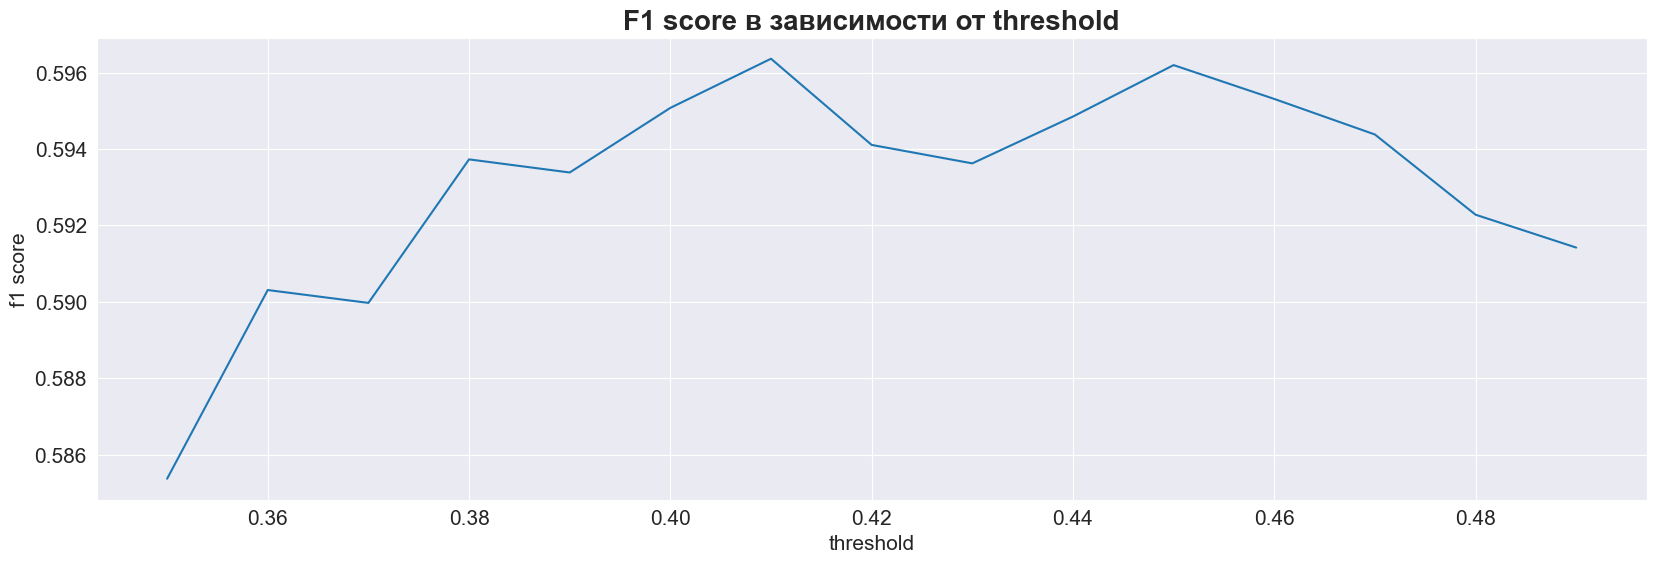

In [41]:
%%time
# RandomForestClassifier
kf = StratifiedKFold(n_splits=5, random_state=777, shuffle=True)

# Задаем диапазон threshold для тестирования
thresholds = [x/100 for x in list(range(35, 50, 1))]

thresholds_for_graph = []
f1_scores_for_graph = []

for threshold in thresholds:
    # Переменная для хранения оценки по сплитам
    f1_scores = []
    for i, (train_index, dev_index) in enumerate(kf.split(X_train_modified, y_train_modified)):
        # По каждому сплиту делаем отдельный train и dev датасет
        X_train_split = X_train_modified.iloc[train_index]
        y_train_split = y_train_modified.iloc[train_index]
        X_dev_split = X_train_modified.iloc[dev_index]
        y_dev_split = y_train_modified.iloc[dev_index]

        # Отделяем нули от единиц по таргету
        y_train_zeros = y_train_split[y_train_modified == 0]
        y_train_ones = y_train_split[y_train_modified == 1]

        # Отделяем нули от единиц по фичам
        X_train_zeros = X_train_split.loc[y_train_zeros.index]
        X_train_ones = X_train_split.loc[y_train_ones.index]

        # Склеиваем снова с добавлением единиц
        X_train_split = pd.concat([X_train_zeros] + [X_train_ones] * ratio)
        y_train_split = pd.concat([y_train_zeros] + [y_train_ones] * ratio)

        # Перемешиваем
        X_train_split, y_train_split = shuffle(X_train_split, y_train_split, random_state=777)

        # Скейлим
        X_train_split_scaled = scaler.fit_transform(X_train_split)

        # Обучаем модель
        selected_model.fit(X_train_split, y_train_split)

        # Создаем функцию расчёта prediction по prediction_proba
        calc_prediction_for_threshold = np.vectorize(lambda x: 0 if x < threshold else 1)

        # Считаем f1 по threshold
        f1_scores.append(f1_score(y_dev_split, calc_prediction_for_threshold(selected_model.predict_proba(X_dev_split)[:, 1])))


    # Считаем среднюю оценку по сплитам и добавляем в листs
    f1_scores_for_graph.append(sum(f1_scores)/len(f1_scores))
    thresholds_for_graph.append(threshold)

# Строим график
fig, ax = plt.subplots(figsize=(20, 6))
ax.set_title('F1 score в зависимости от threshold', fontsize=20, weight='bold')
ax.set_xlabel('threshold', fontsize=15)
ax.set_ylabel('f1 score', fontsize=15)
ax.tick_params(axis='both', labelsize=15)
ax.plot(thresholds_for_graph, f1_scores_for_graph)

# Выбор лучшей threshold
max_index = f1_scores_for_graph.index(max(f1_scores_for_graph))
best_threshold = thresholds_for_graph[max_index]
display(f'Лучший threshold: {thresholds_for_graph[max_index]:.2}, средний f1 для этой threshold: {f1_scores_for_graph[max_index]:.2}')

### Выводы

* Из всех представленных выше гипотез подтвердились только две: замена пропусков на медиану по has_cr_card и upsampling даёт прирост по f1_score. При этом замена на медиану даёт слишком незначительный прирост.
* **Модель для итогового тестирования: RFC, max_depth=19, n_estimators: 37, upsampling c ratio=4, для пропусков в столбце tenure используем заглушки со значением -1. Оптимальный threshold: 0.41.**

## Финальное тестирование

In [42]:
# Проверим первоначальные данне, модель и ratio
X_train.shape, y_train.shape, X_test.shape, y_test.shape, selected_model, ratio

((8000, 12),
 (8000,),
 (2000, 12),
 (2000,),
 RandomForestClassifier(max_depth=19, n_estimators=37, random_state=777),
 4)

In [43]:
# Сделаем апсемплинг
# Отделяем нули от единиц по таргету
y_train_zeros = y_train[y_train_modified == 0]
y_train_ones = y_train[y_train_modified == 1]

# Отделяем нули от единиц по фичам
X_train_zeros = X_train.loc[y_train_zeros.index]
X_train_ones = X_train.loc[y_train_ones.index]

# Склеиваем снова с добавлением единиц
X_train = pd.concat([X_train_zeros] + [X_train_ones] * ratio)
y_train = pd.concat([y_train_zeros] + [y_train_ones] * ratio)

# Перемешиваем
X_train, y_train = shuffle(X_train, y_train, random_state=777)

# Скейлим
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)

In [44]:
# Обучим модель еще раз
selected_model.fit(X_train_scaled, y_train)

RandomForestClassifier(max_depth=19, n_estimators=37, random_state=777)

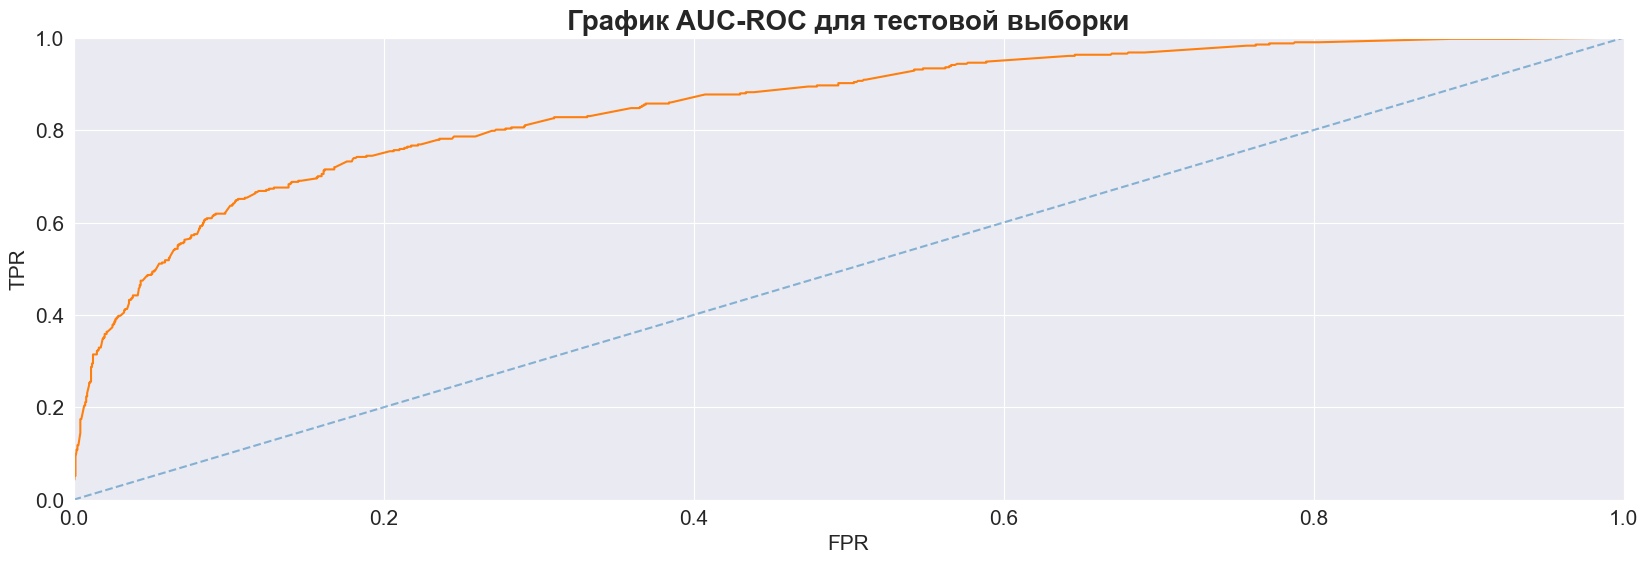

'Итоговая оценка F1 на тествовй выборке с базовым threshold: 0.61'

'Итоговая оценка F1 на тествовй выборке c оптимальным threshold: 0.62'

'Итоговая оценка ROC-AUC на тествовй выборке: 0.85'

In [45]:
# Смотрим на результаты на тестовой выборке
# Скелим фичи
X_test_scaled = scaler.transform(X_test)

# Построим график для ROC-AUC:
fpr, tpr, thresholds = roc_curve(y_test, selected_model.predict_proba(X_test_scaled)[:, 1])
fig, ax = plt.subplots(figsize=(20, 6))
ax.plot([0,1], [0,1], linestyle='--', alpha=0.5)
ax.plot(fpr, tpr)
ax.set_title('График AUC-ROC для тестовой выборки', weight='bold', fontsize=20)
ax.set_xlabel('FPR', fontsize=15)
ax.set_ylabel('TPR', fontsize=15)
ax.tick_params(axis='both', labelsize=15)
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
plt.show()

# Результаты
display(f'Итоговая оценка F1 на тествовй выборке с базовым threshold: {f1_score(y_test, selected_model.predict(X_test_scaled)):.2}')
calc_prediction_for_threshold = np.vectorize(lambda x: 0 if x < best_threshold else 1)
display(f'Итоговая оценка F1 на тествовй выборке c оптимальным threshold: {f1_score(y_test, calc_prediction_for_threshold(selected_model.predict_proba(X_test_scaled)[:, 1])):.2}')
display(f'Итоговая оценка ROC-AUC на тествовй выборке: {roc_auc_score(y_test, selected_model.predict_proba(X_test_scaled)[:, 1]):.2}')

## Выводы по проекту

* Загружены и изучены дынные банка. Всего 10000 семплов. 909 пропусков в столбце tenure заменены на заглушку. Дубли в данных отсутствуют.
* Целевой столбец несбалансирован. Доля покинувших банк клиентов составляет порядка 20%.
* Датасет подготовлен для обучения, разбит на тренировочную и тестовую выборки (80% на 20%), неинформативные столбцы удалены, категориальные столбцы переведены в dummie.
* Построен ряд первоначальных моделей (LR, DTC, RFC), подобраны первоначальные оптимальные параметры. Лучшие результаты по F1 score показала модель RFC с параметрами max_depth=19 и n_estimators: 37. Эта модель была выбрана за базовую.
* Для улучшения результатов базовой модели проверен ряд гипотез. Проверка показала, что качество модели с точки зрения F1 score можно улучшить за счёт устранения дисбаланса в целевом столбце (upsampling). Подобран оптимальный threshold: 0.41.
* При помощи updsampling с ratio=4 модель была снова обучена и протестирована на тестовой выборке. **Достигнуты результаты выше целевых. Итоговый F1 score при стандартной threshold: 0.62.**
* Итоговая оценка ROC-AUC на тестовой выборке составила 0.85.